In [1]:
# Data wrangling:
import pandas as pd

# Seleção e validação dos modelos:
from sklearn.model_selection import train_test_split

# Modelos:
from pmdarima.arima import auto_arima

# Deployment:
import pickle

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
rcParams['figure.figsize'] = 15, 6

## DataFrame:

In [3]:
path = r'../../data/dataset_CASTING_DB108.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    parse_dates=['VUF_DT'],
    index_col='VUF_DT',
    usecols=['VUF_DT', 'VUF_VLRLIQFINAL']
)

In [4]:
df.head()

,VUF_VLRLIQFINAL
VUF_DT,
2022-06-18,15.0
2022-06-18,32.0
2022-06-20,15.0
2022-07-15,248.0
2022-07-15,352.0


## Preparação dos dados:

### Agrupando por mês:

In [5]:
df = (
    df.groupby(
        (df.index).to_period("M")
    )['VUF_VLRLIQFINAL'].sum()
)

### Removendo o mês de outubro:

In [6]:
df = df.drop(df.index[-1])

## Visualização:

### ACF:

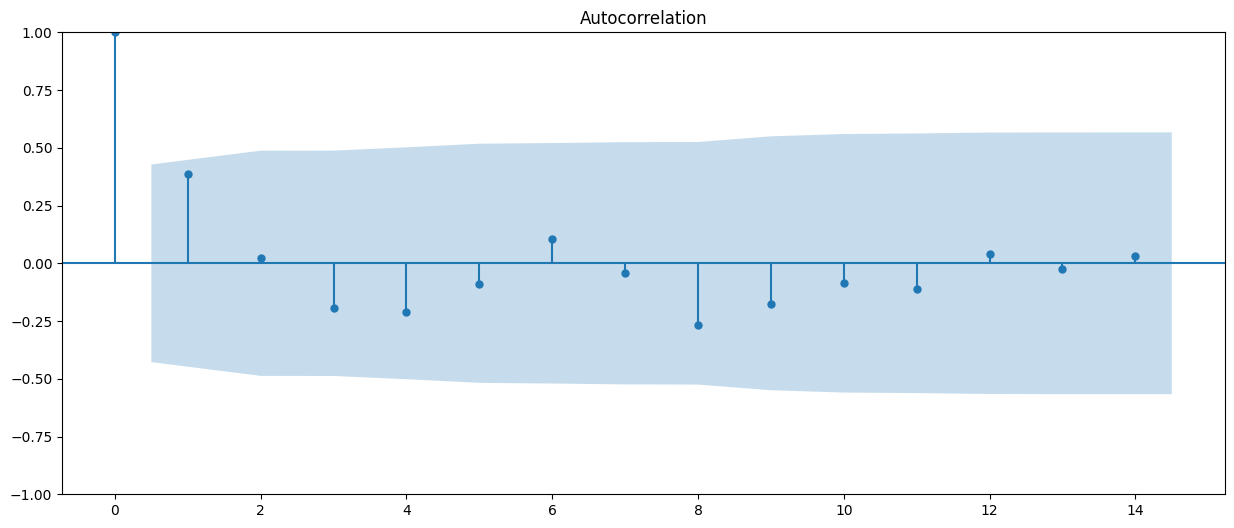

In [7]:
plot_acf(df)
plt.show()

### PACF:

In [8]:
# plot_pacf(df)
# plt.show()

## Modelo:

### Procurando Modelo:

In [9]:
model = auto_arima(
    df,
)

### Melhor Resultado:

In [10]:
print(model.aic())

543.9449615305956


In [11]:
print(model.aicc())

545.3567262364779


In [12]:
print(model.bic())

547.0785288437659


***Obs:*** *Quanto menor o valor melhor.*

### Train-test Split:

In [13]:
train = df.loc['2022-01-01':'2023-08-01']
test = df.loc['2023-09-01':]

### Treinando o modelo:

In [14]:
model.fit(train)

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

## Avaliação:

### Resíduo:

In [15]:
test - model.predict(n_periods=1)

VUF_DT
2023-09   -16501.730075
Freq: M, dtype: float64

***Resíduo*** = *Valor Real - Valor Previsto*

### Deployment:

In [16]:
path = r'../../models/DB108_arima.pkl' 

with open(path, 'wb') as file:
    pickle.dump(model, file)